In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")


In [ ]:

df=pd.read_csv('/content/credit_dataset.csv')
df

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [ ]:

df.dtypes

Unnamed: 0          int64
ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [ ]:

label=LabelEncoder()
lst=['GENDER','CAR','REALITY','INCOME_TYPE','HOUSE_TYPE','EDUCATION_TYPE','FAMILY_TYPE']
for i in lst:
    df[i]=label.fit_transform(df[i])

In [ ]:
df['HOUSE_TYPE'].value_counts()

1    22102
5     1430
2      812
4      439
3      199
0      152
Name: HOUSE_TYPE, dtype: int64

In [ ]:

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [ ]:

X_train.shape

(17593, 17)

In [ ]:

y_train.shape

(17593,)

In [ ]:

mms=MinMaxScaler()
X_train_mms=mms.fit_transform(X_train)
X_test_mms=mms.transform(X_test)


 **prediction Before oversampling and undersampling**

In [ ]:

knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC(degree=5)
clf=DecisionTreeClassifier(criterion='entropy')

models=[knn,nb,sv,clf]
for model in models:
    print('*'*20,model,'*'*20)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('_'*20)

******************** KNeighborsClassifier(n_neighbors=7) ********************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7427
           1       1.00      0.03      0.05       114

    accuracy                           0.99      7541
   macro avg       0.99      0.51      0.52      7541
weighted avg       0.99      0.99      0.98      7541

____________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7427
           1       0.00      0.00      0.00       114

    accuracy                           0.98      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.97      0.98      0.98      7541

____________________
******************** SVC(degree=5) ********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7427
      

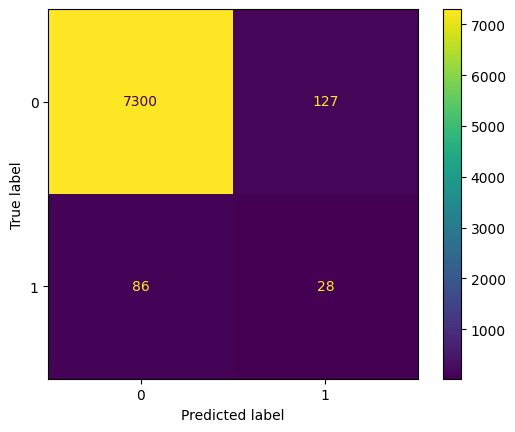

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:

y_train.value_counts()

0    17285
1      308
Name: TARGET, dtype: int64

In [ ]:

#OVER SAMPLING
from imblearn.over_sampling import SMOTEN
smn=SMOTEN()
X_train_smn,y_train_smn=smn.fit_resample(X_train,y_train)

In [ ]:
y_train_smn.value_counts()

0    17285
1    17285
Name: TARGET, dtype: int64

Predictions after oversampling using **SMOTEN**

In [ ]:

knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC(degree=5)
clf=DecisionTreeClassifier(criterion='entropy')

models=[knn,nb,sv,clf]
for model in models:
    print('*'*20,model,'*'*20)
    model.fit(X_train_smn,y_train_smn)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('_'*20)

******************** KNeighborsClassifier(n_neighbors=7) ********************
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7427
           1       0.06      0.17      0.09       114

    accuracy                           0.95      7541
   macro avg       0.52      0.56      0.53      7541
weighted avg       0.97      0.95      0.96      7541

____________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.99      0.39      0.56      7427
           1       0.02      0.71      0.03       114

    accuracy                           0.40      7541
   macro avg       0.50      0.55      0.30      7541
weighted avg       0.97      0.40      0.56      7541

____________________
******************** SVC(degree=5) ********************
              precision    recall  f1-score   support

           0       0.98      0.31      0.47      7427
      

In [ ]:

y_train.value_counts()

0    17285
1      308
Name: TARGET, dtype: int64

In [ ]:

#UNDER SAMPLING
from imblearn.under_sampling import RandomUnderSampler
ran=RandomUnderSampler()
X_train_ran,y_train_ran=ran.fit_resample(X_train,y_train)

In [ ]:
y_train_ran.value_counts()

0    308
1    308
Name: TARGET, dtype: int64

Predictions after UNDERsampling using **RandomunderSampler**

In [ ]:

knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC(degree=5)
clf=DecisionTreeClassifier()

models=[knn,nb,sv,clf]
for model in models:
    print('*'*20,model,'*'*20)
    model.fit(X_train_ran,y_train_ran)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('_'*20)

******************** KNeighborsClassifier(n_neighbors=7) ********************
              precision    recall  f1-score   support

           0       0.99      0.55      0.71      7427
           1       0.02      0.63      0.04       114

    accuracy                           0.55      7541
   macro avg       0.51      0.59      0.37      7541
weighted avg       0.98      0.55      0.70      7541

____________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.99      0.57      0.72      7427
           1       0.02      0.68      0.05       114

    accuracy                           0.57      7541
   macro avg       0.51      0.62      0.39      7541
weighted avg       0.98      0.57      0.71      7541

____________________
******************** SVC(degree=5) ********************
              precision    recall  f1-score   support

           0       0.99      0.68      0.80      7427
      

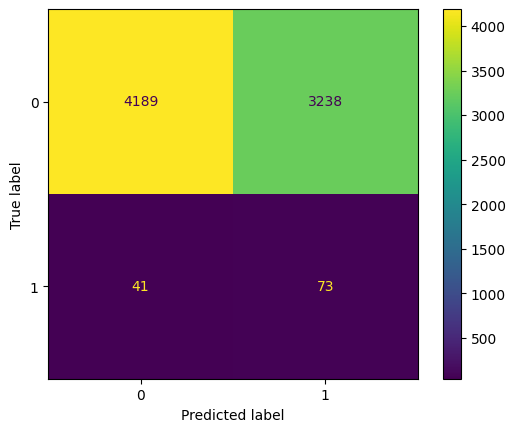

In [ ]:

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))